---

## Understanding K-Means Clustering: A Guide to Unsupervised Machine Learning

Machine learning algorithms can be broadly classified into two categories: supervised and unsupervised learning. The key difference lies in the presence of a target variable.

In unsupervised learning, there is no target variable; the dataset consists only of input variables that describe the data. This is where K-Means clustering, a popular unsupervised learning algorithm, comes into play.


### What is K-Means Clustering?

K-Means clustering is used when we have unlabelled data, meaning data without defined categories or groups. The algorithm simplifies data classification into a certain number of clusters (denoted by 'K') that are fixed apriori. It achieves this by iteratively assigning each data point to one of the K groups based on their features' similarity. The primary goal is to group data points based on their feature similarity, aiming to minimize the within-cluster variance.

### Understanding Clusters and Centroids

In the context of K-Means clustering, a **centroid** represents the center of a cluster. Each cluster is defined by its centroid, and the algorithm iteratively calculates the centroids during its execution.

However, determining the right number of clusters (K) can be challenging, especially in high-dimensional datasets. Here are steps to address this challenge:

1. **Trial and Error (Trying Different K Values)**: Experiment with different values of K (the number of centroids) to find the most suitable one.

2. **Initialization of Centroids**: Start by initializing K centroids randomly in the feature space.

3. **Centroid Update**: Compute the average of all data points assigned to each centroid, updating the centroid's position accordingly.

### The K-Means Clustering Algorithm: How it Works

1. **Data Assignment Step**:
   - Each centroid defines a cluster. In this step, each data point is assigned to the nearest centroid based on the squared Euclidean distance.

2. **Centroid Update Step**:
   - Update the centroids by calculating the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between these two steps until a stopping criterion is met. Common stopping criteria include no change in cluster assignments, minimizing the sum of distances, or reaching a maximum number of iterations.

### Finding the Optimal Number of Clusters (K)
To see whether our clustering algorithm performs well, we need more than a scatter plot. The common metrics we used are:

**Inertia** is the within-cluster sum of square distance, which is used in k-means algorithm's objective function.

**Silhouette Coefficient** is a measure of how dense and separated are the clusters. The silhouette coefficient is a property assigned to each data point. The Silhouette value ranges from -1 to 1, where higher values (closer to 1) indicate better-defined clusters.

**The elbow method** is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

---

### Practical implementation of K-Mean Clustering


**Import Libraries**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset:
This dataset has been obtained from UCI ML Repository. https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

context: Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.



In [61]:
df = pd.read_csv('/content/Live.csv')

In [62]:
df.shape

(7050, 16)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

# Explore

 we want to make clusters using more than two features, but which of the features should we choose? Often times, this decision will be made for you. For example, a stakeholder could give you a list of the features that are most important to them. If you don't have that limitation, though, another way to choose the best features for clustering is to determine which numerical features have the largest variance. That's what we'll do here.

Drop Reduandant Columns

In [64]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

Drop status_type, status_id and status_published variable from the dataset

In [65]:
df.drop(['status_type','status_id', 'status_published'], axis=1, inplace=True)

In [66]:
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


What is Variance?

Variance (which is sometimes called volatility in finance), is a measurement of how spread out the points in a dataset are around the mean. It's calculated by first summing up the squared different between each data point and mean, then dividing by the number of data points minus 1.

Calculate the variance for all the features in df, and create a Series top_5_var with the 5 features with the largest variance.

In [67]:
df.var().sort_values()

num_angrys            0.528256
num_sads              2.550907
num_hahas            15.659301
num_wows             76.032303
num_loves          1597.835141
num_shares        17318.550917
num_likes        202025.399758
num_reactions    214022.176652
num_comments     791453.670644
dtype: float64

# Split

In [73]:
X = df

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (7050, 9)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


# Standard Scaling:

**Standardization**

Standardization is a widely used scaling technique to transform features before fitting into models. Feature scaling changes all a dataset's continuous features to give us a more consistent range of values. Specifically, we subtract the mean from each data point and then divide by the standard deviation:

𝑋̂ =𝑋−𝜇𝜎,

The goal of standardization is to improve model performance having all continuous features be on the same scale

In [74]:
from sklearn.preprocessing import StandardScaler
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (7050, 9)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [75]:
X_scaled_summary = X_scaled.aggregate(['mean', 'std']).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 9)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
mean,0,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1,1


**Build Model**

First, Build a KMeans model,and fit it to the training data X, find centroid, intertia and silhouette score

In [76]:
from sklearn.cluster import KMeans
# take cluste k=3
model = KMeans(n_clusters=3, random_state=0)

# Fit model to data
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=0)

**Inertia**
Inertia is the within-cluster sum of square distance, which is used in k-means algorithm's objective function.

Basically, the inertia is the sum of the distance of each point to the centroid or center of its assigned cluster. A lower inertia means the points assigned to the clusters are closer to the centroid.


In [77]:
# find inertia
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 2735257865.1114435


**Silhouette Score**

Silhouette Coefficient is a measure of how dense and separated are the clusters. The silhouette coefficient is a property assigned to each data point

The silhouette coefficient ranges from -1 to 1. If a point is really close to the centroid of its assigned cluster, then  𝑎≪𝑏
  and the silhouette coefficient will be approximately equal to 1. If the reverse is true,  𝑎≫𝑏
 , then the coefficient will be -1. If the point could have been assigned to either cluster, its coefficient will be 0.

Higher silhouette coefficient means higher density and highly separated clusters. This is because we want to have lower  𝑎
  (close to assigned cluster's centroid) and higher  𝑏
  (far away from unassigned cluster's centroid). A lower  𝑎
  value combined with higher  𝑏
  value will produce a higher silhouette score.

In [79]:
# find silhouette score
from sklearn.metrics import silhouette_score
ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.8121434245162984


Interpret:

In the case of KMeans clustering with 3 clusters:

1. **Inertia (Within-Cluster Sum of Squares)**:
   Inertia represents the sum of squared distances of data points to their closest cluster center. For the given clustering with 3 clusters, the inertia is approximately 2,735,257,865.11. A lower inertia indicates that the data points are closer to the centroids of their respective clusters, suggesting a better fit of the clusters to the data.

2. **Silhouette Score**:
   The Silhouette Score is a metric that measures the separation distance between the resulting clusters. A higher silhouette score (ranging from -1 to 1) indicates that the clusters are well apart from each other and clearly distinguished. In this case, the Silhouette Score is approximately 0.812, which is a high score. It implies that the clusters are well-defined and distinct from each other, demonstrating a good clustering arrangement.

Overall, a lower inertia and a higher Silhouette Score in this context suggest that the KMeans algorithm successfully grouped the data into three clusters that are internally compact and well-separated from each other.

**Goal KMean Clustering:**

Here we Have High inertia,

A very high inertia value in the context of KMeans clustering may indicate that the clusters are widely spread or that the number of clusters (in this case, 3) might not be the optimal choice for the given data.

In KMeans clustering, the goal is to minimize the inertia. If you have a very high inertia, it could imply that the clusters are not compact, and there may be a suboptimal number of clusters for the given data.

To potentially improve the clustering and reduce the inertia, you could experiment with different values of the number of clusters (n_clusters) in the KMeans algorithm. You might try using methods like the Elbow Method or Silhouette Score to determine the optimal number of clusters for your specific dataset.

Here's an example of how you might use the Elbow Method to determine the optimal number of clusters:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

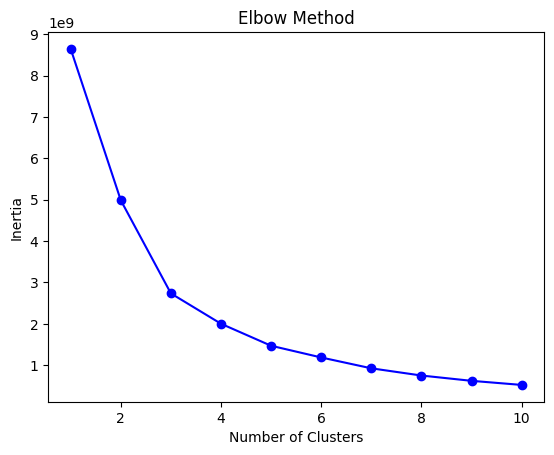

In [83]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

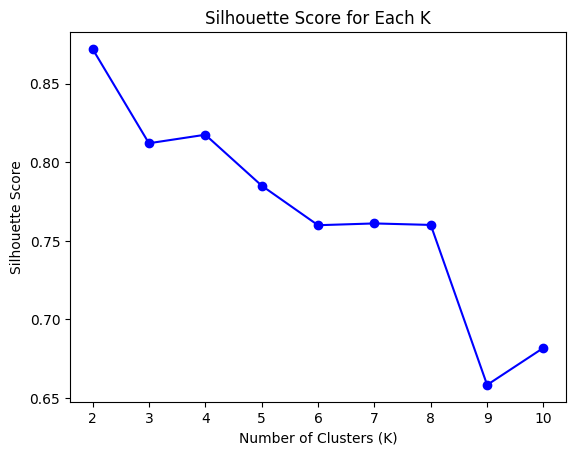

In [82]:
# Initialize a range of potential cluster numbers (K)
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each K')
plt.show()

# Model Pipeline

we could  Use a **for loop** to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). Your model should include a StandardScaler. Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.

In [ ]:
from sklearn.pipeline import make_pipeline

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # model build
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    # train model
    model.fit(X)
    # calculate intertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    #calculate silhouette score
    silhouette_scores.append(silhouette_score(X, model.named_steps['kmeans'].labels_))


print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

In [86]:
import plotly.express as px
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters, y= inertia_errors, title="K-Means Model: Inertia vs Number of Clusters"

)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")
fig.show()

In [87]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title="K-Means Model: Silhouette Score vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Silhouette Score")
fig.show()

# Final Model:

Build and train a new k-means model named final_model. Use the information you gained from the two plots above to set an appropriate value for the n_clusters argument. Once you've built and trained your model.


In [90]:
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)

)

# Fit model to data
final_model.fit(X)
final_model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

**Communicate with the Model**

Extract the labels that your final_model created during training and assign them to the variable labels.

In [92]:
labels = final_model.named_steps['kmeans'].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 7050
[0 0 0 0 0]


Create a DataFrame xgb that contains the mean values of the features in X for each of the clusters in your final_model

In [93]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 9)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,109.779374,74.045179,16.552203,102.821999,5.996648,0.522350,0.286718,0.112069,0.037516
1,1823.311828,61.333333,11.645161,1817.534946,3.104839,2.435484,0.198925,0.032258,0.005376
2,538.492105,2728.015789,391.144737,418.002632,107.578947,3.805263,5.400000,2.376316,1.313158
3,1522.617647,1718.500000,750.264706,1088.617647,298.205882,101.941176,29.058824,2.970588,1.823529


Use plotly express to create a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters in your final_model.

In [94]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode='group',
    title="Mean Cluster"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [$]")
fig.show()

# PCA
Principal component analysis (PCA) is a dimension reduction technique that takes a data set characterized by a set of possibly correlated features and generates a new set of features that are uncorrelated.

It is used as a dimension reduction technique because the new set of uncorrelated features are chosen to be efficient in terms of capturing the variance in the data set.

In practice, PCA is rarely used when the dimension of the data set is already low. However, it is easier to illustrate the method when we have two or three dimensions.

Here, Create a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca

In [95]:
from sklearn.decomposition import PCA
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=['PC1', 'PC2'])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (7050, 2)


,PC1,PC2
0,372.669904,308.269641
1,-242.585457,-59.785646
2,11.501158,-11.721604
3,-252.700910,-113.974859
4,-227.065240,21.618671


In [96]:
labels.astype(str)

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U11')

In [97]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x= 'PC1',
    y= 'PC2',
    color=labels.astype(str),
    title="PCA Representation of Clusters"


)
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

fig.show()